<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação 
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

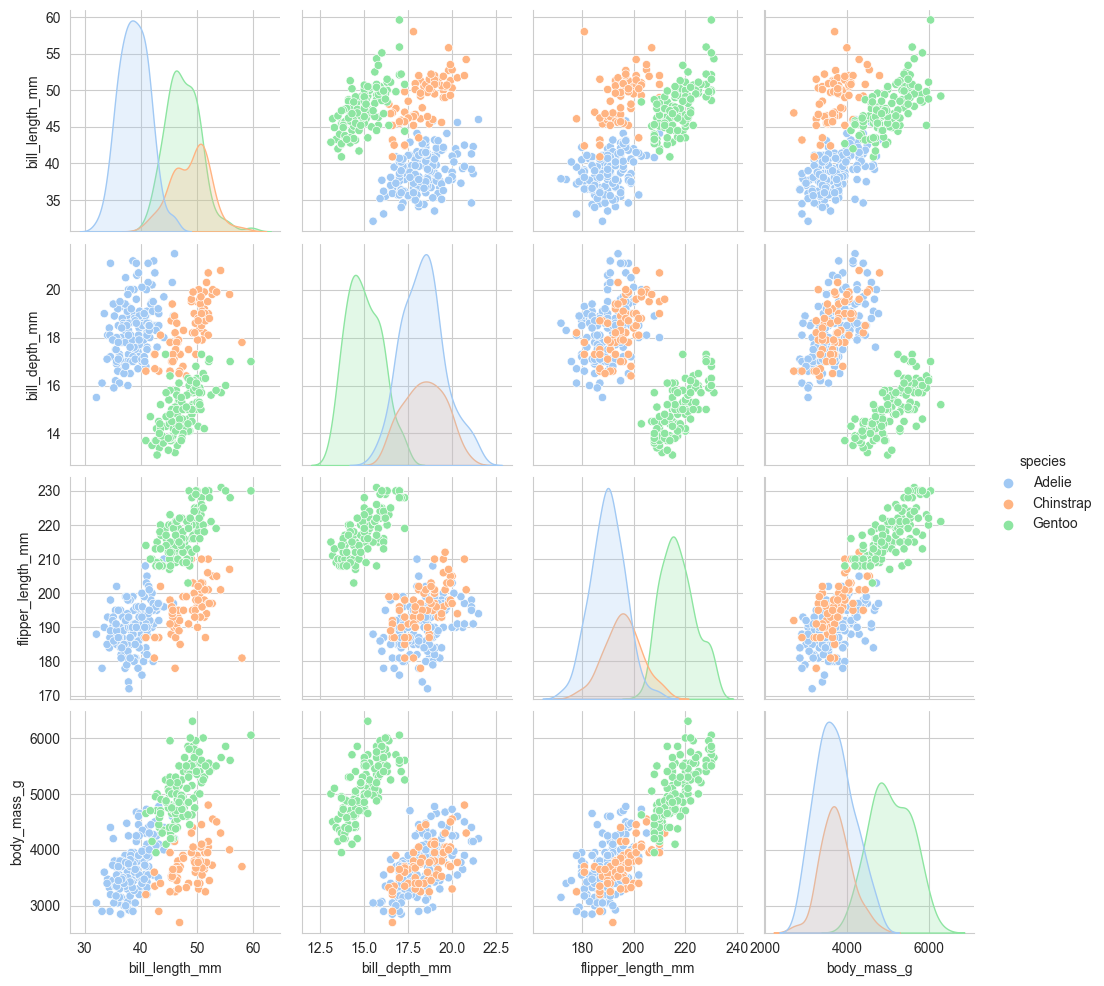

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:** É possível ver que há diferenças significativas entre as espécies de pinguins em relação aos tamanhos, exceto ao peso e as nadadeiras que aparentam ter uma correlação positiva. A espécie gento possui a maior massa, já as outras duas tem caracteristicas próximas.

 - Sexo por espécie:

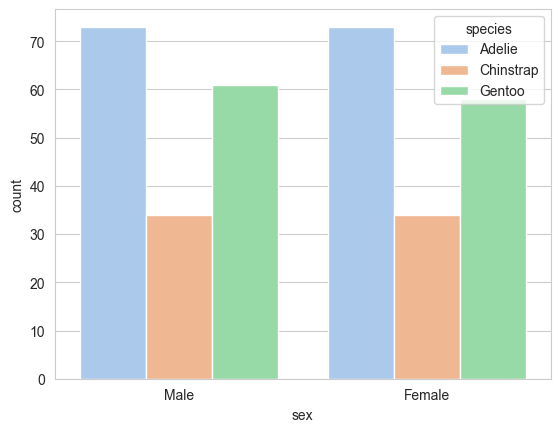

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:** Para cada espécie a proporção é igual de machos e fêmeas. Em comparação, a espécie Adelie tem a maior quantidade geral, seguido de Gentoo e Chinstrap.

 - Ilha por espécie:

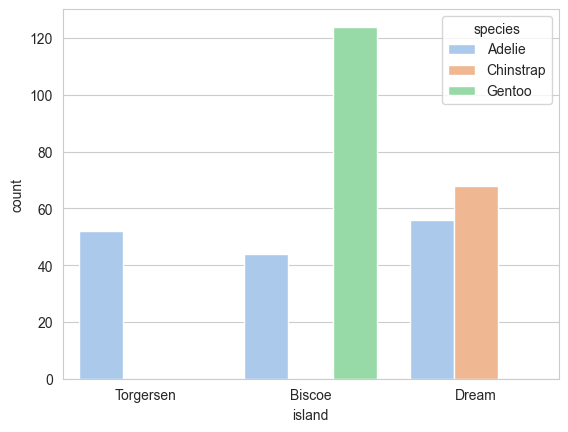

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:**

• A espécie Adelie está presente em todas as ilhas mas unicamente na de Torgersen.
• A espécie Chinstrap está presente apenas na ilha Dream e tem a  menor quantidade.
• A espécie Gentoo está presente apenas na ilha Biscoe e tem a maior quantidade.


## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [7]:
data = pd.DataFrame(penguim)
data.dropna(inplace=True)
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **2.2. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [8]:
data['sex_m'] = data['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
data['sex_f'] = data['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)

data['island_torgersen'] = data['island'].apply(lambda island: 1 if island == 'Torgersen' else 0)
data['island_biscoe'] = data['island'].apply(lambda island: 1 if island == 'Biscoe' else 0)
data['island_dream'] = data['island'].apply(lambda island: 1 if island == 'Dream' else 0)

data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_m,sex_f,island_torgersen,island_biscoe,island_dream
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,1,0,0


### **2.3. Limpeza** 

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe. 

In [9]:
data_limpa0 = data.drop(data.columns[[1,6]], axis=1)
#transformei o dataframe em array para evitar alguns erros
data_limpa = data_limpa0.to_numpy()

In [14]:
data_limpa[:,1:]

array([[39.1, 18.7, 181.0, ..., 1, 0, 0],
       [39.5, 17.4, 186.0, ..., 1, 0, 0],
       [40.3, 18.0, 195.0, ..., 1, 0, 0],
       ...,
       [50.4, 15.7, 222.0, ..., 0, 1, 0],
       [45.2, 14.8, 212.0, ..., 0, 1, 0],
       [49.9, 16.1, 213.0, ..., 0, 1, 0]], dtype=object)

### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [15]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data_limpa[:,1:],
    data_limpa[:,0],
    test_size=0.25,
    random_state=123
)

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** 9 folhas.

In [16]:
model = DecisionTreeClassifier()
model = model.fit(predictors_train, target_train)
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x2049a27bec0>}

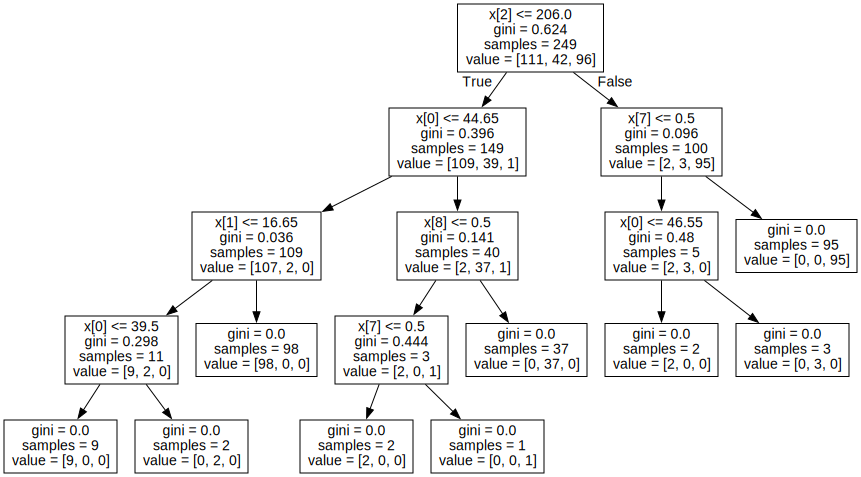

In [17]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

### **3.2. Avaliação** 

**a.** Matriz de Confusão 

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** Aparenta ser um bom modelo já que possui apenas 4 erros na espécie Adelie e 1 em Gentoo.

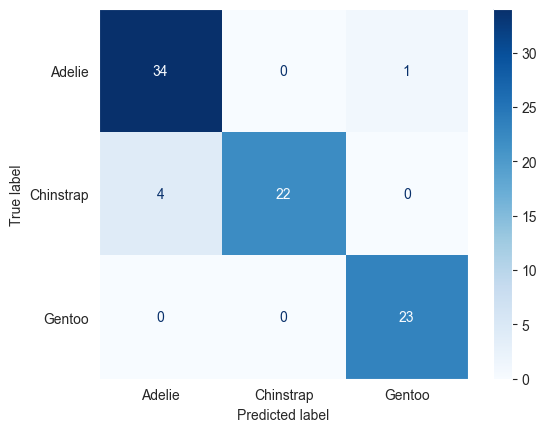

In [18]:
#parece que reformularam o plot_confusion_matrix para esse confusionmatrixdisplay, fiz uma pesquisa basica de como usa-lo e o resultado foi esse
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

target_predicted = model.predict(predictors_test)

confusion_matrix = confusion_matrix(target_test, target_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_).plot(include_values=True, cmap='Blues')
plt.grid(False)
plt.show()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [19]:
#total = confusion_matrix.sum()
#acertos = np.diag(confusion_matrix).sum()
#acuracia = acertos / total
print(f"{round(np.diag(confusion_matrix).sum() /confusion_matrix.sum() * 100, 2)}%")

94.05%


## 4\. Predição  

### **4.1. Novo penguim** 

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [34]:
data_limpa[0:1, :]

array([['Adelie', 39.1, 18.7, 181.0, 3750.0, 1, 0, 1, 0, 0]], dtype=object)

In [21]:
novo_penguim = np.array([38.2, 18.1, 181.0, 3950.0, 1, 0, 0, 1, 0])
resultado = model.predict(novo_penguim.reshape(1, -1))
print(resultado)

['Adelie']


---